# Building Universes

Let's solve the Friedmann equation numerically.  There are really two different ways to do it, neither of which is perfect.

## Integrating The Friedmann Equation

In integral form, the Friedmann equation can be written
$$
H_0 (t - t_0) = \int_1^a \frac{da}{\sqrt{\Omega_{r,0}/a^2 + \Omega_{m,0}/a + \Omega_{\lambda,0}a^2 + (1 - \Omega_0)}}.
$$
Note the integration limits -- to make every universe we build have their scale factor be one (the current epoch) at the same place on the graph, we'll integrate from a = 1 (today) to a = a (some scale factor, can be less then 1 or greater than 1).  That means on the horiztonal axis, a value of 0 indicates the current time.

Here's some code for this.

In [4]:
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

# convert H0 to Gyrs
H0 = 68.0 / 3.086e+19 * (60*60*24*365*1e9)

In [12]:
def create_universe_int(Omega_r0 = 9e-5, Omega_m0 = 0.31, Omega_l0 = 0.69, amax = 10):

    Omega_0 = Omega_r0 + Omega_m0 + Omega_l0

    # this is the integrand
    def f(a):
        return 1.0 / np.sqrt(Omega_r0 / a**2 + Omega_m0 / a + Omega_l0 * a**2 + (1.0 - Omega_0))

    # set up the integration
    N = 1000
    a = np.linspace(1e-5, amax, N)

    t = np.zeros(N)
    for i in range(N):
        t[i], err = integrate.quad(f, 1, a[i])
        
    print(f"Current age of this universe: {-t[0]/H0}") 

    return t, a

Test it for our universe:

Current age of this universe: 13.74194958241408


Text(0, 0.5, '$a$')

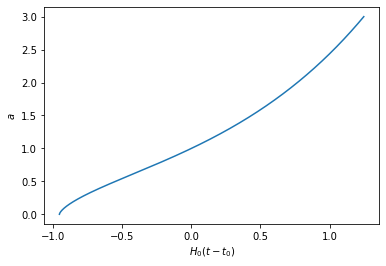

In [13]:
t1, a1 = create_universe_int(amax = 3)
plt.plot(t1, a1)

plt.xlabel("$H_0 (t-t_0)$")
plt.ylabel("$a$")

## Solving Friedmann as a Differential Equation

We can also write the Friedmann equation as
$$
\frac{da}{dt} = H_0 \sqrt{ \frac{\Omega_{r,0}}{a^2} + \frac{\Omega_{m,0}}{a} + \Omega_{\Lambda,0}a^2 + (1 - \Omega_0) }.
$$
This is a first order ODE so is pretty easy to solve numerically.

In [14]:
def create_universe_ode(Omega_r0 = 9e-5, Omega_m0 = 0.31, Omega_l0 = 0.69, tmax = 50):

    Omega_0 = Omega_r0 + Omega_m0 + Omega_l0

    dt = 1e-4  # in Gyrs
    t_start = 0
    t_end = tmax

    t = np.arange(t_start, t_end, dt)
    N = len(t)
    a = np.zeros(N)
    a[0] = 1e-4

    for i in range(1, N):
        da = H0 * np.sqrt( Omega_r0 / a[i-1]**2 + Omega_m0 / a[i-1] + Omega_l0 * a[i-1]**2 + (1 - Omega_0) ) * dt
        a[i] = a[i-1] + da

    # remove all NaNs if there are any
    t = t[~np.isnan(a)]
    a = a[~np.isnan(a)]

    # find the current age of the universe - when a = 1
    t0 = t[np.argmin(abs(a-1))]

    print(f"Current age of this universe: {t0} Gyrs")

    # scale to H0(t-t0)
    return H0 * (t - t0), a

Current age of this universe: 13.7416 Gyrs


Text(0, 0.5, '$a$')

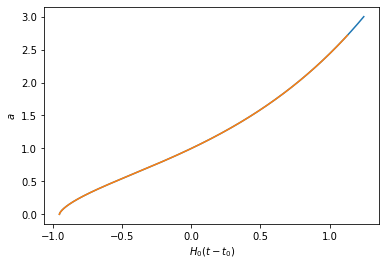

In [21]:
t2, a2 = create_universe_ode(tmax = 30)
plt.plot(t1, a1)
plt.plot(t2, a2)

plt.xlabel("$H_0 (t-t_0)$")
plt.ylabel("$a$")